# User Rating History 

In [1]:
%matplotlib inline
%load_ext rpy2.ipython

import requests
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir

In [2]:
handle = 'chenmark'
url = 'http://codeforces.com/api/user.rating?handle=' + handle

r = requests.get(url).json()['result']

In [6]:
rating_history = pd.DataFrame.from_dict(r)

  contestId                    contestName   handle newRating oldRating rank
0       358 Codeforces Round #208 (Div. 2) chenmark      1561      1500  569
1       361 Codeforces Round #210 (Div. 2) chenmark      1557      1561  350
2       362 Codeforces Round #212 (Div. 2) chenmark      1532      1557  473
3       366 Codeforces Round #214 (Div. 2) chenmark      1676      1532   82
4       369 Codeforces Round #216 (Div. 2) chenmark      1609      1676  477
5       370 Codeforces Round #217 (Div. 2) chenmark      1699      1609   44
  ratingUpdateTimeSeconds
0              1382722200
1              1384110000
2              1384450200
3              1385314200
4              1385746200
5              1386406800


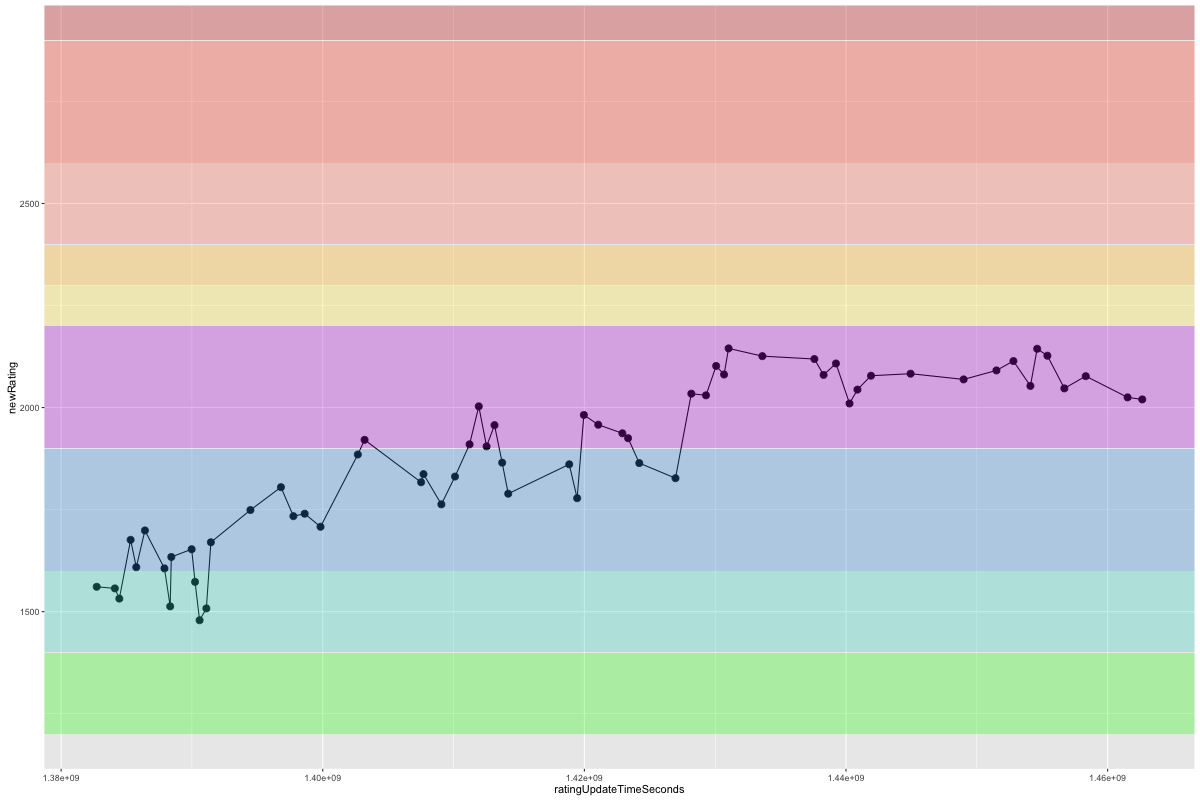

In [19]:
%%R -i rating_history -w 1200 -h 800 -u px
library(ggplot2)

blank_theme <- theme(
        #axis.line.y = element_blank(),
        #axis.line.x = element_blank(),
        #panel.grid.major = element_blank(),
        #panel.grid.minor = element_blank(),
        #panel.border = element_blank(),
        #panel.background = element_blank(),
        #axis.ticks.y = element_blank(),
        #axis.text.y = element_blank(),
        #axis.title.y = element_blank(),
        legend.position = 'bottom') 


df <- as.data.frame(rating_history)
print(head(df))
c <- ggplot(df, aes(x=ratingUpdateTimeSeconds, y = newRating))
c <- c + 
    geom_point(alpha=1, size = 3) + 
    geom_line(alpha=1, size = .55555) + 
    annotate("rect", ymin=1200, ymax=1399, xmin=-Inf, xmax=Inf, color=NA, fill='green', alpha=.3) +
    annotate("rect", ymin=1400, ymax=1599, xmin=-Inf, xmax=Inf, color=NA, fill='#30DBCA', alpha=.3) +
    annotate("rect", ymin=1600, ymax=1899, xmin=-Inf, xmax=Inf, color=NA, fill='#3094DB', alpha=.3) +
    annotate("rect", ymin=1900, ymax=2199, xmin=-Inf, xmax=Inf, color=NA, fill='#B930DB', alpha=.3) +
    annotate("rect", ymin=2200, ymax=2299, xmin=-Inf, xmax=Inf, color=NA, fill='#FFEA4D', alpha=.3) +
    annotate("rect", ymin=2300, ymax=2399, xmin=-Inf, xmax=Inf, color=NA, fill='#FFBF00', alpha=.3) +
    annotate("rect", ymin=2400, ymax=2599, xmin=-Inf, xmax=Inf, color=NA, fill='#FF7E61', alpha=.3) +
    annotate("rect", ymin=2600, ymax=2899, xmin=-Inf, xmax=Inf, color=NA, fill='#FF4117', alpha=.3) +
    annotate("rect", ymin=2900, ymax=Inf, xmin=-Inf, xmax=Inf, color=NA, fill='#CC0000', alpha=.3) +
    #facet_wrap(~participantType, ncol=1) +
    #facet_wrap(~verdict, ncol=1) +
    #scale_y_continuous(limits=c(1000, 5000)) + 
    blank_theme
print(c)